# Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [25]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv(r"C:\Users\91828\Downloads\mushrooms.csv")

In [27]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratory data analysis

C:\Users\91828\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

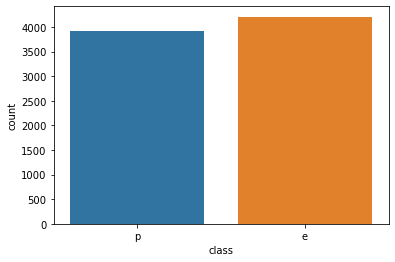

In [28]:
sns.countplot(data['class'])

so edible class is more than poisoness

In [29]:
data['habitat'].values

array(['u', 'g', 'm', ..., 'l', 'l', 'l'], dtype=object)

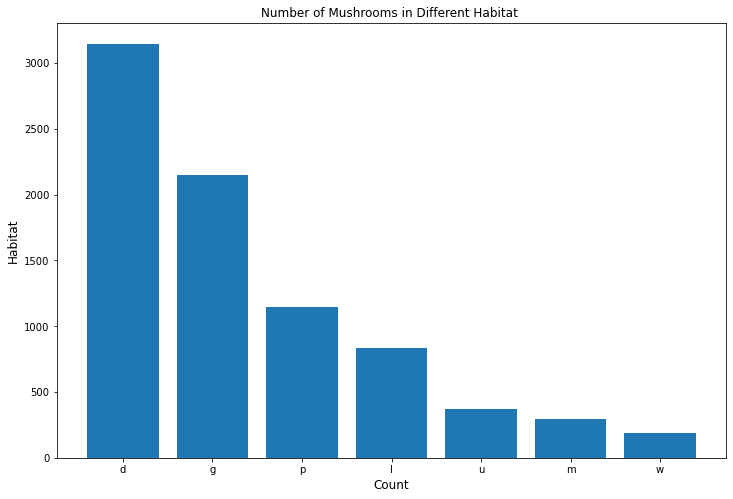

In [35]:
count=data['habitat'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(count.index,count)
plt.ylabel("Habitat",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.title("Number of Mushrooms in Different Habitat ")
plt.show()

Mushrooms are mostly found on woods and grasses and are rarely grown in waste,meadows and urban.

In [31]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Data Preprocessing

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Since these are categorical data,We have to convert this into numerical form by doing encoding.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)   
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


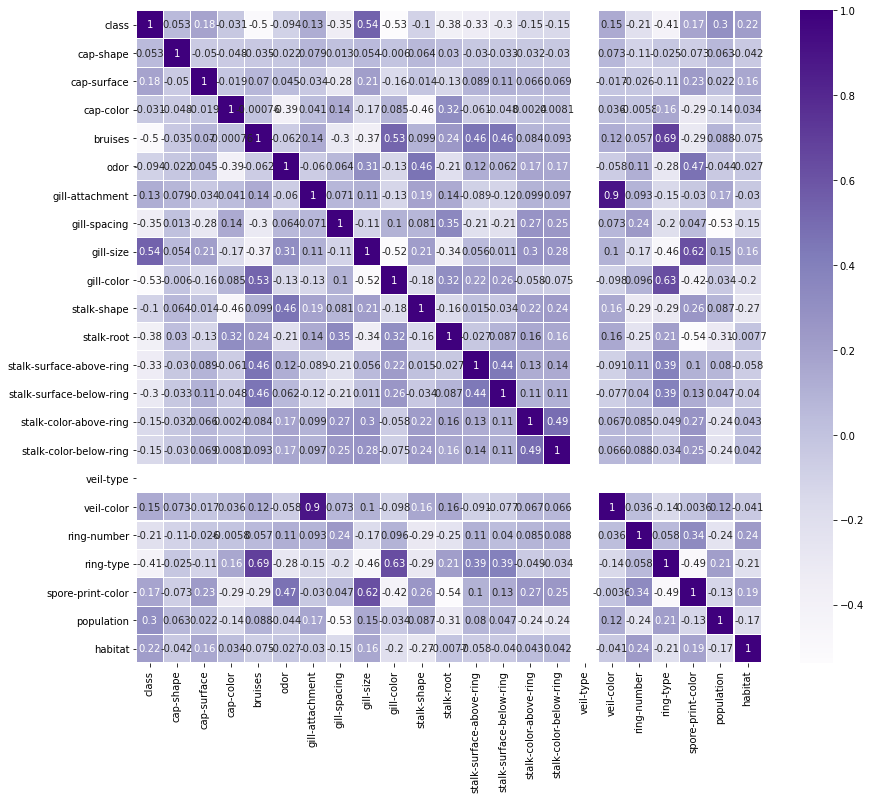

In [37]:
#Correlation
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples", annot=True)
plt.yticks(rotation=0);

In [ ]:
data1=data.drop('veil-type',axis=1)

In [ ]:
#Splitting and Trainning 

In [ ]:
x = data1.drop(['class'] , axis = 1)
y = data1['class']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

# Models

# 1.Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt.score(x_train , y_train)

1.0

In [41]:
predictions = dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

1.0

# 2.Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

1.0

In [47]:
predictions = rf.predict(x_test)
accuracy_score(y_test , predictions)

1.0

# 3.Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\91828\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
accuracy_score(y_test,y_pred)

0.9495488105004102

# 4.SVM

In [62]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred)

1.0

# 5.KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

value=[]
nbs=np.arange(3,15)
for k in nbs:
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model=knn.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(pred,y_test)
    value.append(acc)
value

[0.9987694831829368,
 0.9987694831829368,
 0.9975389663658737,
 0.9971287940935193,
 0.9975389663658737,
 0.9958982772764561,
 0.9963084495488105,
 0.994667760459393,
 0.9954881050041017,
 0.9938474159146842,
 0.9938474159146842,
 0.992616899097621]

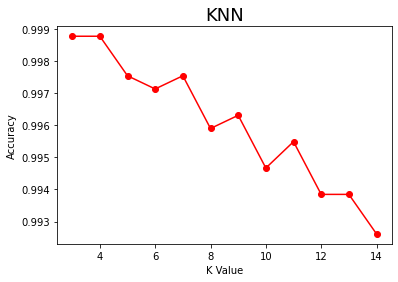

In [66]:
plt.plot(nbs,value,'o-',color='r')
plt.title('KNN',fontsize=18)
plt.xlabel('K Value')
plt.ylabel('Accuracy');

here k=3for highest accuracy

In [68]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model=knn.fit(x_train,y_train)
predi=model.predict(x_test)

In [70]:
accuracy_score(y_test,predi)

0.9987694831829368

# 6.Naive Bayes Classification

# Gaussian Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9150943396226415

# Bernoulli Naive Bayes

In [85]:
#Fitting Bernoulli Naive Bayes to the training set
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [86]:
y_pred1=nb.predict(x_test)
accuracy_score(y_test,y_pred1)

0.839622641509434

Test Accuracy of Guassian Naive Bayes: 91%
Test Accuracy of Bernoulli Naive Bayes: 84%
Test Accuracy of Logistic Regression: 95% 
Test Accuracy of KNN Model: 99.8%
Test Accuracy of Decision Tree Classification: 100%
Test Accuracy of SVM Model: 100.0%
Test Accuracy of Random Forest Classification: 100%

Hence decision tree,SVM,Random Forest,KNN are the best fit models and we can predict whether the mushrooms are edible or not using these models,